# Integrating a generic, python tool in pyiron (Level B, recommended approach)

If we need to repeatedly, perform a combination of processes to return a value, a plot, etc., it might make sense to create a Job class for it. Here, we create a simple workflow using available python tools for a specific problem.

Problem: 
we are given as an input the positions of a some particles, plus a energy constant.  
the goal of the workflow: 
- calculate the mean harmonic energy
- return a 3D plot of the cloud of particles.

In [1]:
from pyiron_base import PythonTemplateJob, DataContainer
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class harmonicEnergy(PythonTemplateJob):
    def __init__(self, project, job_name):
        super(harmonicEnergy, self).__init__(project, job_name)
        self.input=DataContainer(table_name='inputs')

    def read_input(self, file_name):
        self.input.read(file_name)
    
    def calc_mean_harmonic_energy(self):
        counter=0
        d2=0
        for i,p1 in enumerate(self.input.positions.to_builtin()):
            for p2 in self.input.positions.to_builtin()[i+1:]:
                p2_vec=np.array(p2)
                p1_vec=np.array(p1)
                d = p2_vec - p1_vec
                d_val = math.sqrt(np.dot(d, d))-self.input.equilibrium_lengh
                d2+=d_val**2
                counter+=1
        self.avg_d2=d2/counter
        self.avg_energy=self.input.energy_constant*self.avg_d2
    
    def scatter_plot(self):
        x = [ self.input.positions.to_builtin()[k][0] for k in range(0, len(self.input.positions.to_builtin()))]
        y = [ self.input.positions.to_builtin()[k][1] for k in range(0, len(self.input.positions.to_builtin()))]
        z = [ self.input.positions.to_builtin()[k][1] for k in range(0,len(self.input.positions.to_builtin()))]
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(x, y, z, marker='o')

    # This function is executed 
    def run_static(self):
        self.calc_mean_harmonic_energy()
        with self.project_hdf5.open("output/generic") as h5out: 
             h5out["avg_harmonic_energy"] = self.avg_energy
        self.status.finished = True

## Exercise 1:
Create a project and a job of type harmonicEnergy, which reads in `input.yml` and calculates the mean harmonic energy. Also create the 3d scatter plot of the particles.

In [3]:
from pyiron_base import Project
pr=Project("python_demo")
pr.remove_jobs_silently(recursive=True)

In [4]:
job=pr.create_job(job_type=harmonicEnergy, job_name='harmonic_energy')

In [5]:
job.read_input('input.yml')

In [6]:
job.run()

The job harmonic_energy was saved and received the ID: 117


In [7]:
job.input

DataContainer({'energy_constant': 0.1, 'equilibrium_lengh': 5.0, 'positions': DataContainer([DataContainer([3.137544466813198, -1.980814354656597, -4.197124310786901]), DataContainer([-2.6890042295246017, 1.8501549920906113, 0.023231338665228307]), DataContainer([-0.21694792294922394, 4.52462902567602, 4.747091691273553]), DataContainer([-1.3730328920596602, 3.345133072507805, -2.3966747431507196]), DataContainer([2.7537916983387056, 1.6128594035836397, 4.1022385836569]), DataContainer([-4.670628783489295, -3.4027456446008153, -1.2682900977875233]), DataContainer([-0.024009392615576886, -0.7000473804666187, 0.2955825557994345]), DataContainer([3.8025392209805897, -4.370649970003432, -0.20762411583497542]), DataContainer([-2.788465316883393, 4.449722862556019, -3.1178268869918546]), DataContainer([2.4406679645582585, -0.2785484738255857, -2.6818032676754067]), DataContainer([-4.11093749753287, 4.011545224548557, -2.570528164948338]), DataContainer([-3.90282132805013, -3.629025741377605,

In [8]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,117,finished,None,harmonic_energy,/harmonic_energy,/home/muhammad/,workspace/tmp/PMD-workflow-workshop2/2_customized_job/python_demo/,2021-04-29 03:31:10.870275,None,None,pyiron@cmleo14#1,harmonicEnergy,0.4,None,None


In [9]:
job

{'groups': ['input', 'output'], 'nodes': ['HDF_VERSION', 'NAME', 'TYPE', 'VERSION', 'server', 'status']}

In [10]:
job['output/generic/avg_harmonic_energy']

0.9899414339265156

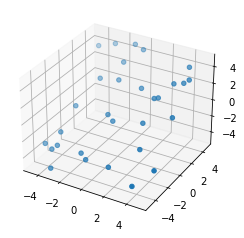

In [11]:
job.scatter_plot()